<a href="https://colab.research.google.com/github/siming-deng/micro_cred_winter_2022/blob/main/Conclusions_Unit_4_Titanic__Logistic_Regression_MLL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Analysis

From Kaggle: The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Tasks:



1.   Every step must have an explanation
2.   Every plot/ chart must have an iterpretation
3.   Add your observations for each section
4.   Draw clear conclusions (at least 5 conclusions)



In [ ]:
#importing libaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# read the csv file
train = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/titanic_train.csv')

In [ ]:
# showing the first data set
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#recalling data table
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#show the missing data number
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#show the percentage of missing data and cleaning up data
#formula to calculate the missing data percentage: 100*(train.isnull().sum()/len(train))
#we can use this function in all dataframes.
def missing_values_percent(train):
    nan_percent=100*(train.isnull().sum()/len(train))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)

nan_percent = missing_values_percent(train)
nan_percent

Embarked     0.224467
Age         19.865320
Cabin       77.104377
dtype: float64

Column Cabin has 77% missing values. 
Column Age has around 20% missing values.
Column Embarked has 0.2% missing values.
It's better to drop the Cabin column because it has the most missing values and with only 23% non-missing values, there is no significant to analyze this column set.

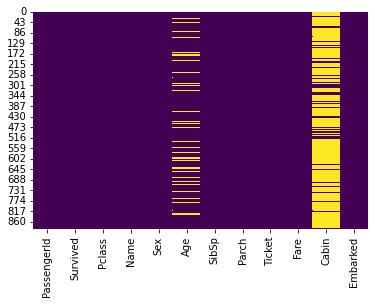

In [ ]:
#show missing data as a heat map using sns
sns.heatmap(train.isnull(), cbar = False,  cmap = 'viridis')

In [ ]:
#Drop Cabin column
#https://www.w3schools.com/Python/pandas/ref_df_dropna.asp
train.drop('Cabin', axis=1, inplace= True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


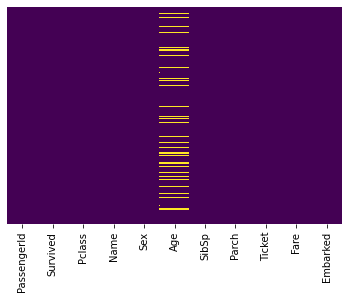

In [ ]:
#show missing data as a heat map using sns after dropping the Cabin column
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [ ]:
#How many passengers survived? 0 = not survived, 1 = survived
train["Survived"].value_counts(normalize=False)

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
#Percentage of passengers survived, 0 = not survived, 1 =. survived
train["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

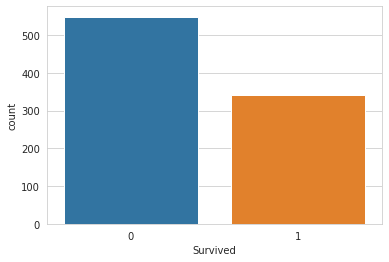

In [ ]:
# graph counting survived and not survived
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

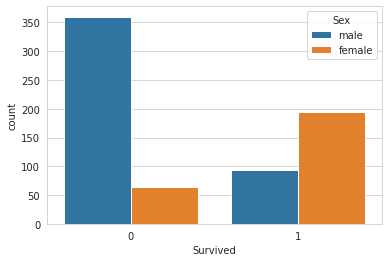

In [ ]:
# dropped rows with missing values
train.dropna(inplace=True)
sns.set_style('whitegrid')
# created a count plot for survived column separated by sex
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

In [ ]:
# data frame after dropping all the missing values
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 86.8+ KB


In [ ]:
# mean value closer to 1 means higher survival rate
print(train.groupby(["Pclass"])["Survived"].mean().to_frame())
print(train.groupby(["Pclass"])["Survived"].count().to_frame())

        Survived
Pclass          
1       0.652174
2       0.479769
3       0.239437
        Survived
Pclass          
1            184
2            173
3            355


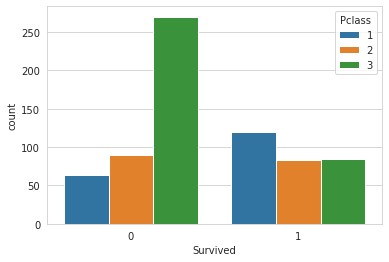

In [ ]:
# a count plot to count number of survival based on Pclass
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

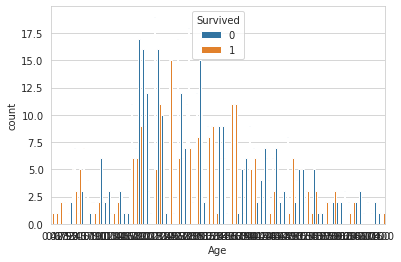

In [ ]:
# display people with different ages and count how many people survived and not survived
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue = 'Survived', data = train)

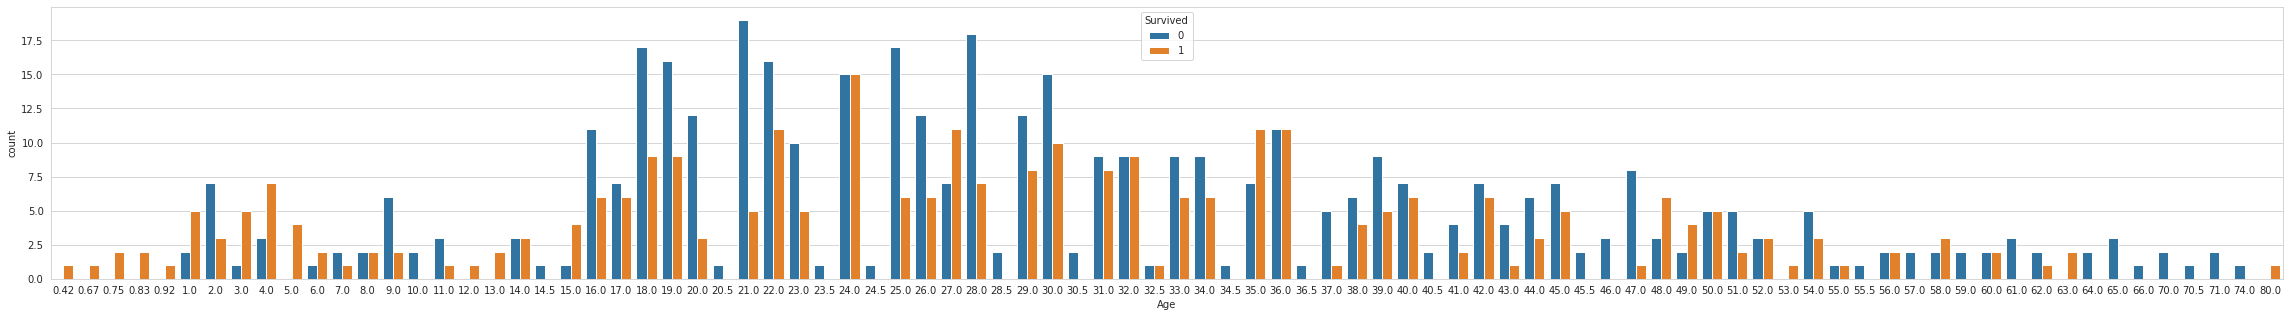

In [ ]:
#resizing the plot
plt.figure(figsize=(40,5))
sns.set_style('whitegrid')
sns.countplot(x = 'Age', hue = 'Survived', data = train)

In [ ]:
#Stack chart advanced sns for cs
def bar_chart_stacked(dataset, feature, stacked = True):
  survived = train[train["Survived"] == 1][feature].value_counts()
  dead = train[train["Survived"] == 0][feature].value_counts()   
  df_survived_dead = pd.DataFrame([survived, dead])  
  df_survived_dead.index = ["passengers survived","passengers died"]   
  df_survived_dead.plot(kind = "bar", stacked = stacked, figsize = (8,5), rot = 0)

In [ ]:
# group the dataset by Pclass and only shows survived column with its mean
train.groupby(["Pclass"])["Survived"].mean().to_frame()

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


We see that 65% of passengers in class 1 were survived but this amount is reduced to 48% for class 2 and only 24% of passengers in class 3 were survived. This means that the percentage of survived passengers in class 1 is 2 times bigger than the percentage of died passengers in this class. But in class 2 the percentage of survived people and died people is almost equal and for class 3 the percentage of died people is three times bigger than survived one.

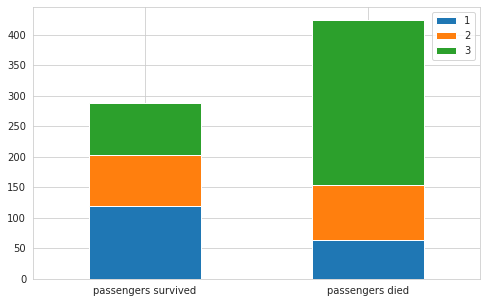

In [ ]:
# display the stacked bar chart for survived based on Pclass 
bar_chart_stacked(train,"Pclass")

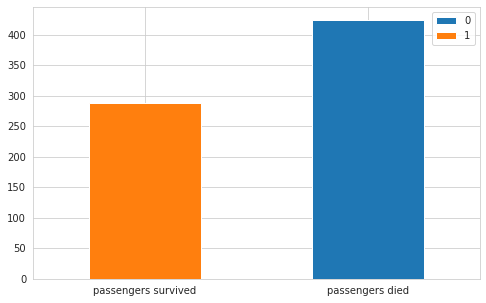

In [ ]:
# bar chart showing number of people survived and number of people died
bar_chart_stacked(train,"Survived")

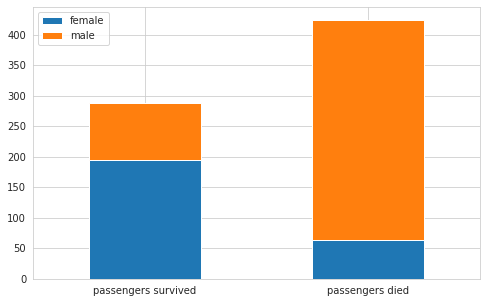

In [ ]:
#compare the survived and dead passengers counts on gender
bar_chart_stacked(train,"Sex")

In [ ]:
# a function to compare survival rate by sex and pclass
def bar_chart_compare(dataset, feature1, feature2 = None):
    plt.figure(figsize=(8,5))
    plt.title("survived rate by sex and pclass")
    g = sns.barplot(x = feature1, y = "Survived", hue = feature2, data = dataset).set()

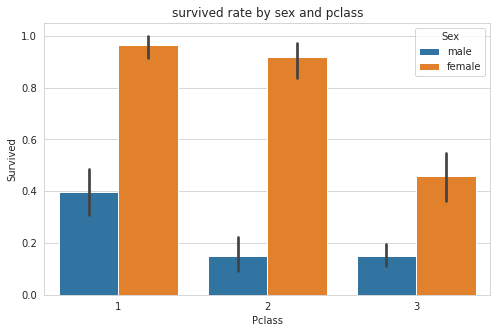

In [ ]:
# display the bar chart showing survival rate by sex and pclass
bar_chart_compare(train,"Pclass","Sex")

We see that the number of men and women who were survived is decreasing according to class. In addition, men and women in class 1 had a significantly higher chance of survival if they bought class 1 tickets.

In [ ]:
#https://www.dataindependent.com/pandas/pandas-get-dummies/
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# dropped the sex, embarked, name, and ticket columns
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1, inplace = True)

In [ ]:
# display the first 5 rows after dropping the columns
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
# Concatenate pandas objects along a particular axis 
train = pd.concat([train, sex, embark], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Data Cleaning and Data Pre - Processing

## Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


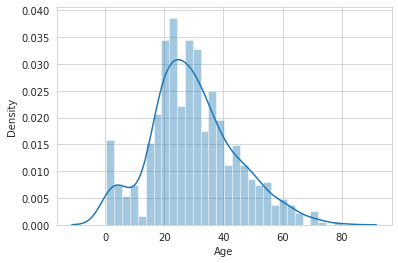

In [ ]:
# created a distribution plot based on age
sns.distplot(train['Age'].dropna(), kde = True, bins = 30)

## Siblings

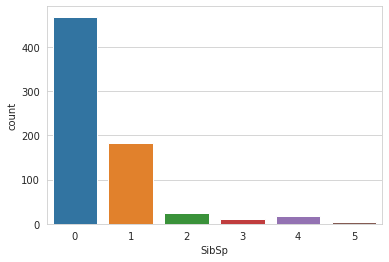

In [ ]:
# a countplot to show how many siblings and spouses among passengers
sns.countplot(x = 'SibSp', data = train)

# Model building

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3,random_state = 101)
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.3, random_state = 101) 

In [ ]:
# store LogisticRegression into a variable
logmodel = LogisticRegression()

In [ ]:
#Traning the Logistic regression model with  traning Data
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# predict using the testing dataset (30% of the remaining data)
predict = logmodel.predict(X_test)

Model Evaluation

Accuracy score

## Classification report
A Classification report is used to measure the quality of predictions from a classification algorithm



In [ ]:
# print out the accuracy report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       128
           1       0.72      0.70      0.71        86

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



# There are four ways to check if the predictions are right or wrong:


TN / True Negative: the case was negative and predicted negative (Did not survived and pridicted that will not survive)

TP / True Positive: the case was positive and predicted positive (survived and pridicted that will survive)

FN / False Negative: the case was positive but predicted negative (survived but predicted will not

FP / False Positive: the case was negative but predicted positive Predicted to survive but did not) 


<h1>Precision — **</h1>







# What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives to the sum of a true positive and false positive.

# Precision:- Accuracy of positive predictions.
**Precision = TP/(TP + FP)**

### Recall — What percent of the positive cases did you catch?
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall:- Fraction of positives that were correctly identified.

**Recall = TP/(TP+FN)**

F1 score — What percent of positive predictions were correct?
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

# Support

Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

## Confusion Matrix
A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model,of (y_test,predict)

In [ ]:
# print confusion matrix
print(confusion_matrix(y_test, predict))
print("Total of 712 cases 30% of the test set is , 214 = 105 + 60 + 26 + 23")

[[105  23]
 [ 26  60]]
Total of 712 cases 30% of the test set is , 214 = 105 + 60 + 26 + 23


True positive: 105 (We predicted a positive result and it was positive)

True negative: 60 (We predicted a negative result and it was negative)

False positive: 23 (We predicted a positive result and it was negative)

False negative: 26 (We predicted a negative result and it was positive)

<img src="https://glassboxmedicine.files.wordpress.com/2019/02/confusion-matrix.png?w=816">


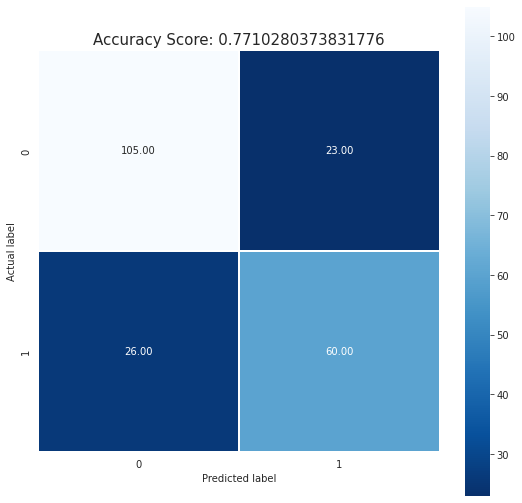

In [ ]:
# heatmap to show confusion matrix and accuracy score
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = '0.2f', linewidths = 0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logmodel.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


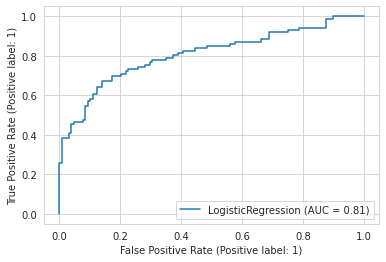

In [ ]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

Observation: The Area Under the Curve (AUC) is 0.81, it describes an excellent discrimination.

<h1># Conclusion...</h1>

we can easily see that the Titanic survival outcome is highly depended on several predictors, such as sex, age and passenger class. In particular, female are more likely to survived than male while keeping other predictors conditions constant, older people are less likely to survived while keeping other predictors conditions constant; and lastly, people from a lower class are less likely to survived keeping other predictors conditions constant.

1) Based on the survival bar graph, there were more woman survivors than male survivors. This makes sense because women were given rescue priority.

2) Based on the survival and class bar graph, we can observe that the number of deaths increased from the first to the third class. However, for survivors first class had the highest number while the third class was tied in with the second class. We observed that 65% of passengers in the first class were survived but this amount is reduced to 48% for second class and only 24% of passengers in the third class were survived.

3) Given the passenger normal age distribution, it is a distribution that is skewed to the right with most passengers being in their 20s, 30s, and 40s.

4) The classification report reveals that the predictions of the training data are precise and accurate given values of above 0.7 with a score of 0.77.

5) An AUC of 0.81 is a high value, it describes an excellent discrimination. Hence the classification model was able to accurate distinguish between the positive and negative classes. For the most part, the predicted true positives is 0.72 and the predicted true negative is 0.80, which are both exceeded their counterparts, hence an accuracy of 0.7.